Start with our usual setup, including the utility methods from last time.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Make matplotlib figures appear inline in the
# notebook rather than in a new window
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

def display(img, title=None):
    # Show image
    plt.figure(figsize = (5,5))
    plt.imshow(img)
    plt.title(title)
    plt.axis('off')
    plt.show()

Optional: we'll use the OpenCV library's convolution function, which is much faster. You may need to run `pip3 install opencv-python` and restart Jupyter notebook.

In [2]:
import cv2

We'll start by reviewing the example from lecture: the iguana and the horizontal derivative.

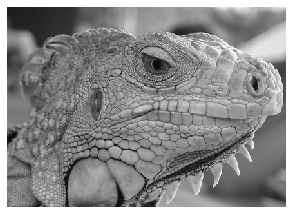

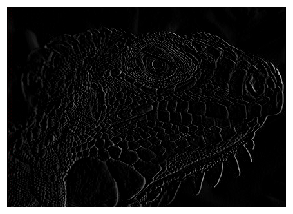

In [3]:
image = cv2.imread("./iguana.png")
display(image)

derivative_filter = np.array(
[
    [1,0,-1]
])

result = cv2.filter2D(image, -1, derivative_filter)
display(result)

# Exercise 1

Let's try and address some of the problems that we found in lecture.

**Sub-problem 1:** The image is dark, and it's hard to tell where the edges are that we found. How can we improve on this? Can we do this in a single filter?

The simplest solution would be to brighten each pixel using the brighten filter:

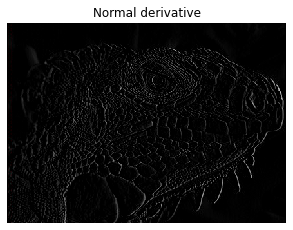

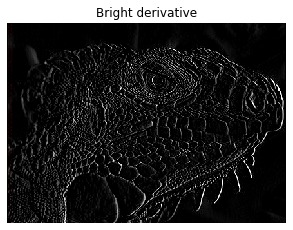

In [4]:
brighten_filter = np.array(
[
    [2.]
])

result_bright = cv2.filter2D(result, -1, brighten_filter)
display(result, "Normal derivative")
display(result_bright, "Bright derivative")

We can combine these sub-passes. If we think about the sequence of filters as the dot product `s(p_1 * f_1 + ... + p_n * f_n)`, we can see that we can distribute the `s` to each `f_n`.

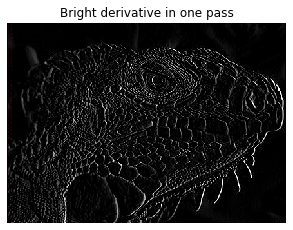

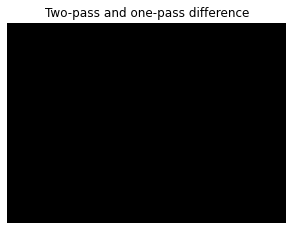

In [5]:
bright_derivative_filter = derivative_filter * 2.

result_bright_2 = cv2.filter2D(image, -1, bright_derivative_filter)
display(result_bright_2, "Bright derivative in one pass")

display(np.abs((result_bright / 255. - result_bright_2 / 255.)), "Two-pass and one-pass difference")

**Sub-problem 2:** The algorithm finds lots of edges, but we don't care about all of them. Could we keep only the brightest edges somehow?

In [1]:
# TODO!!!!!

**Sub-problem 3:** We used a horizontal derivative filter. Create and run a vertical derivative filter. Should it look similar? Does it? Find an image where the horizontal and vertical derivative filters produce very different output.

The vertical derivative should typically look a little different from the horizontal derivative because...

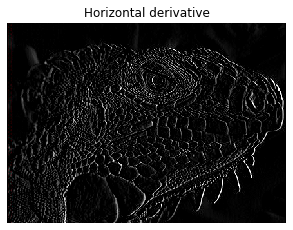

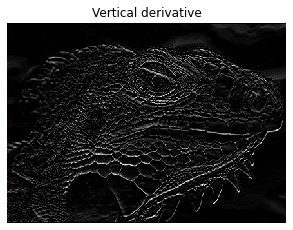

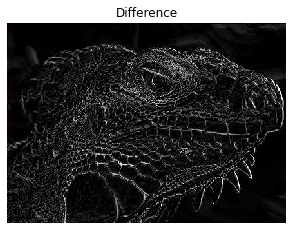

In [7]:
derivative_filter_y = np.array(
[
    [0,  2, 0],
    [0,  0, 0],
    [0, -2, 0],
])

result_bright_y = cv2.filter2D(image, -1, derivative_filter_y)
display(result_bright_2, "Horizontal derivative")
display(result_bright_y, "Vertical derivative")
display(np.abs(result_bright_2 / 255. - result_bright_y / 255.), "Difference")

These two results look visibly different... but not different enough. Behold, the worst case image!

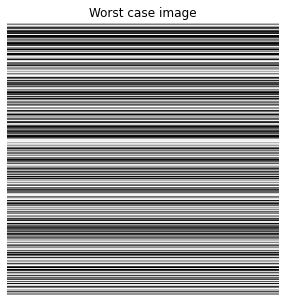

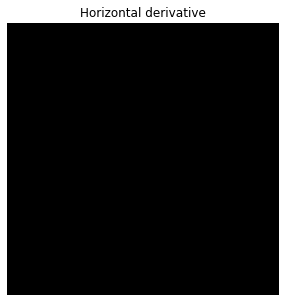

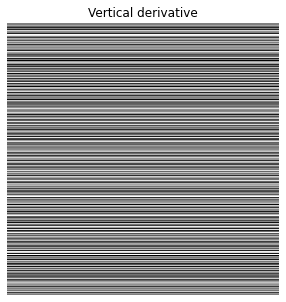

In [8]:
import random

width, height = (500, 500)

def gen_row(_):
    val = random.random()
    return list(map(lambda _: val, range(width)))

bad_image = np.array(list(map(
    gen_row,
    range(height)
)))

bad_bright_x = cv2.filter2D(bad_image, -1, bright_derivative_filter)
bad_bright_y = cv2.filter2D(bad_image, -1, derivative_filter_y)

display(bad_image, "Worst case image")
display(bad_bright_x, "Horizontal derivative")
display(bad_bright_y, "Vertical derivative")

**Sub-problem 4:** How does the derivative filter respond to noise? Load and run the filter on the noisy_einstein image. Can you improve on this result?

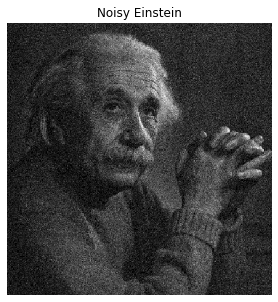

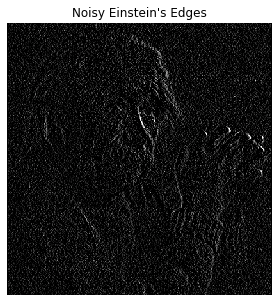

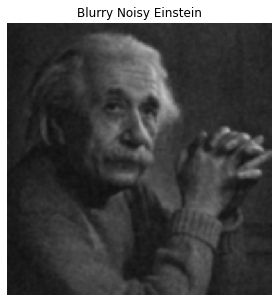

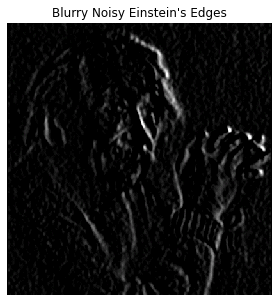

In [9]:
image2 = cv2.imread("noisy_einstein.png")

display(image2, "Noisy Einstein")

image2_result = cv2.filter2D(image2, -1, bright_derivative_filter)
display(image2_result, "Noisy Einstein's Edges")

image2_blur = cv2.GaussianBlur(image2, [0, 0], 2)
display(image2_blur, "Blurry Noisy Einstein")

image2_blur_result = cv2.filter2D(image2_blur, -1, derivative_filter * 7)
display(image2_blur_result, "Blurry Noisy Einstein's Edges")